## **Notebooks Setup**

In [1]:
import sys
from pathlib import Path

cwd = Path().resolve()

for parent in [cwd] + list(cwd.parents):
    if (parent / "src").exists():
        ROOT_DIR = parent
        break

sys.path.insert(0, str(ROOT_DIR))

print("ROOT_DIR:", ROOT_DIR)

ROOT_DIR: D:\Klasifikasi_Pneumonia


## **Import Required Libraries**

In [2]:
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.config.load_config import load_config

config = load_config()
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_path = ROOT_DIR  / config["paths"]["dataset_csv"]

df = pd.read_csv(df_path)
df.head(5)

,img_path,height,width,image_size_kb,label
0,D:/Klasifikasi_Pneumonia/data/processed/chest_...,224,224,17.817,Pneumonia
1,D:/Klasifikasi_Pneumonia/data/processed/chest_...,224,224,16.907,Pneumonia
2,D:/Klasifikasi_Pneumonia/data/processed/chest_...,224,224,11.370,Normal
3,D:/Klasifikasi_Pneumonia/data/processed/chest_...,224,224,13.966,Normal
4,D:/Klasifikasi_Pneumonia/data/processed/chest_...,224,224,18.032,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20768 entries, 0 to 20767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   img_path       20768 non-null  object 
 1   height         20768 non-null  int64  
 2   width          20768 non-null  int64  
 3   image_size_kb  20768 non-null  float64
 4   label          20768 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 811.4+ KB


In [6]:
print(df["label"].value_counts().to_dict())

{'Normal': 10671, 'Pneumonia': 10097}


Image From: D:/Klasifikasi_Pneumonia/data/processed/chest_xray_processed/Pneumonia/pneumonia-416.jpg
The dimensions of the image are 224 pixels width and 224 pixels height, single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 98.3833 and the standard deviation is 59.9981


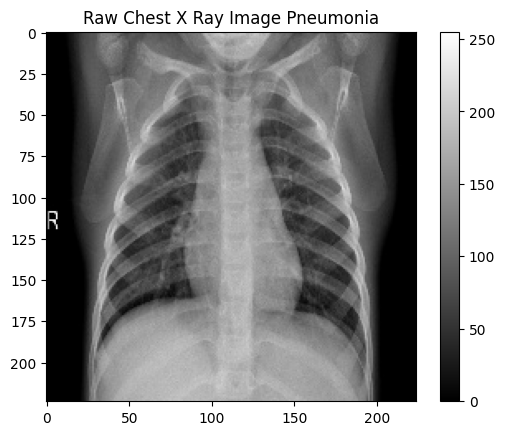

In [7]:
image_path = df["img_path"][0]
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.title(f"Raw Chest X Ray Image {'Normal' if df['label'][0] == 0 else 'Pneumonia'}")

print(f"Image From: {image_path}")
print(f"The dimensions of the image are {img.shape[0]} pixels width and {img.shape[1]} pixels height, single color channel.")
print(f"The maximum pixel value is {img.max():.4f} and the minimum is {img.min():.4f}")
print(f"The mean value of the pixels is {img.mean():.4f} and the standard deviation is {img.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

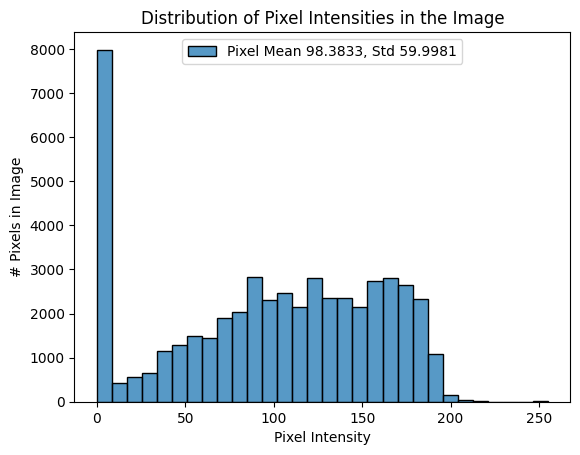

In [8]:
sns.histplot(
    img.ravel(), 
    bins=30, 
    label=f"Pixel Mean {img.mean():.4f}, Std {img.std():.4f}", 
    kde=False
)

plt.legend(loc='upper center')
plt.grid(False)
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

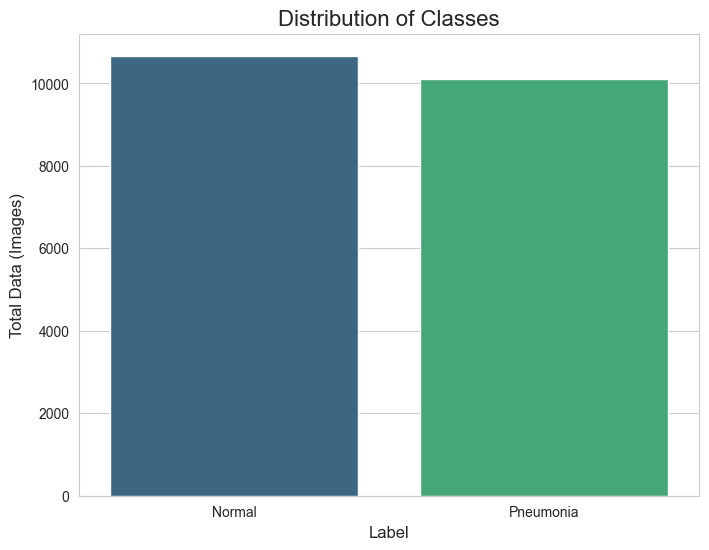

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=["Normal", "Pneumonia"], y=df["label"].value_counts().sort_index(), palette="viridis")
plt.title("Distribution of Classes", fontsize=16)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Total Data (Images)", fontsize=12)
plt.show()